In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Dados do problema

k = 50
h = 25
L = 0.030
thic = 0.0007
dept = 0.006
Tb = 60
Tf = 20

In [7]:
# Pontos nodais
N = 7

In [10]:
# Grade computacional uniforme
dx = L/(N-2)
Deltax = L/(N-2)

In [ ]:
# Parâmetros e termos-fonte
m2 = h * 2 * (thic+dept) / (k * thic * dept)
m = m2 ** (1/2)
SC = m2 * Tf
SCA2 = (Tb/(dx/2)) / Deltax
SPA2 = -(1/(dx/2)) / Deltax
SCAF = 0
SPAF = 0

In [ ]:
a = np.zeros(N+1)
b = np.zeros(N+1)
c = np.zeros(N+1)
d = np.zeros(N+1)
P = np.zeros(N+1)
Q = np.zeros(N+1)
T = np.zeros(N+1)

# Coeficientes das equações
# Volumes de controle internos
for i

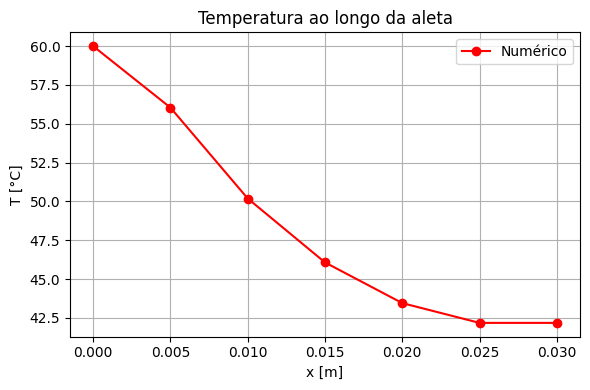

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Exemplo2():

    k = 50
    h = 25
    L = 0.030
    thic = 0.0007
    dept = 0.006
    Tb = 60
    Tf = 20

    N = 7
    dx = L / (N - 2)
    Deltax = dx

    m2 = h * 2 * (thic + dept) / (k * thic * dept)
    m = math.sqrt(m2)

    SC = m2 * Tf
    SP = -m2

    SCA2 = (Tb / (dx/2)) / Deltax
    SPA2 = -(1 / (dx/2)) / Deltax

    SCAF = 0
    SPAF = 0

    a = np.zeros(N+1)
    b = np.zeros(N+1)
    c = np.zeros(N+1)
    d = np.zeros(N+1)
    P = np.zeros(N+1)
    Q = np.zeros(N+1)
    T = np.zeros(N+1)

    # Volumes internos
    for i in range(3, N-1):
        b[i] = 1/dx
        c[i] = 1/dx
        a[i] = b[i] + c[i] - SP*Deltax
        d[i] = SC * Deltax

    # Base
    b[2] = 1/dx
    c[2] = 0
    a[2] = b[2] - (SP + SPA2)*Deltax
    d[2] = (SC + SCA2)*Deltax

    # Ponta
    b[N-1] = 0
    c[N-1] = 1/dx
    a[N-1] = c[N-1] - (SP + SPAF)*Deltax
    d[N-1] = (SC + SCAF)*Deltax

    # TDMA
    P[2] = b[2] / a[2]
    Q[2] = d[2] / a[2]

    for i in range(3, N):
        denom = a[i] - c[i] * P[i-1]
        P[i] = b[i] / denom
        Q[i] = (d[i] + c[i] * Q[i-1]) / denom

    T[N-1] = Q[N-1]

    for i in range(N-1, 1, -1):
        T[i-1] = P[i-1] * T[i] + Q[i-1]

    T[1] = Tb
    T[N] = T[N-1]

    return T[1:N+1], dx


# ------------------------- PLOT -------------------------------- #

T, dx = Exemplo2()
N = len(T)

# coordenadas nodais (0 → L)
x = np.linspace(0, 0.030, N)

plt.figure(figsize=(6,4))
plt.plot(x, T, '-or', label="Numérico")

plt.xlabel("x [m]")
plt.ylabel("T [°C]")
plt.title("Temperatura ao longo da aleta")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import math

def Exemplo2():

    # Dados do Problema
    k = 50
    h = 25
    L = 0.030
    thic = 0.0007
    dept = 0.006
    Tb = 60
    Tf = 20

    # Número de Pontos Nodais
    N = 7

    # Grade Computacional Uniforme
    dx = L / (N - 2)
    Deltax = dx

    # Parâmetros e Termos-Fonte
    m2 = h * 2 * (thic + dept) / (k * thic * dept)
    m = math.sqrt(m2)

    SC = m2 * Tf
    SP = -m2

    SCA2 = (Tb / (dx/2)) / Deltax
    SPA2 = -(1 / (dx/2)) / Deltax

    SCAF = 0
    SPAF = 0

    # Inicialização dos vetores
    a = np.zeros(N+1)
    b = np.zeros(N+1)
    c = np.zeros(N+1)
    d = np.zeros(N+1)
    P = np.zeros(N+1)
    Q = np.zeros(N+1)
    T = np.zeros(N+1)

    # Volumes de Controle Internos
    for i in range(3, N-1):
        b[i] = 1/dx
        c[i] = 1/dx
        a[i] = b[i] + c[i] - SP*Deltax
        d[i] = SC * Deltax

    # Fronteira na base da aleta
    b[2] = 1/dx
    c[2] = 0
    a[2] = b[2] - (SP + SPA2)*Deltax
    d[2] = (SC + SCA2)*Deltax

    # Fronteira na ponta da aleta
    b[N-1] = 0
    c[N-1] = 1/dx
    a[N-1] = c[N-1] - (SP + SPAF)*Deltax
    d[N-1] = (SC + SCAF)*Deltax

    # TDMA
    # Passo 1
    P[2] = b[2] / a[2]
    Q[2] = d[2] / a[2]

    # Passo 2 - avanço
    for i in range(3, N):
        denom = a[i] - c[i] * P[i-1]
        P[i] = b[i] / denom
        Q[i] = (d[i] + c[i] * Q[i-1]) / denom

    # Passo 3
    T[N-1] = Q[N-1]

    # Passo 4 - retro-substituição
    for i in range(N-1, 1, -1):
        T[i-1] = P[i-1]*T[i] + Q[i-1]

    # Temperaturas nas extremidades
    T[1] = Tb
    T[N] = T[N-1]

    return T, a, b, c, d, P, Q


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Exemplo2():

    k = 50
    h = 25
    L = 0.030
    thic = 0.0007
    dept = 0.006
    Tb = 60
    Tf = 20

    N = 7
    dx = L / (N - 2)
    Deltax = dx

    m2 = h * 2 * (thic + dept) / (k * thic * dept)
    m = math.sqrt(m2)

    SC = m2 * Tf
    SP = -m2

    SCA2 = (Tb / (dx/2)) / Deltax
    SPA2 = -(1 / (dx/2)) / Deltax

    SCAF = 0
    SPAF = 0

    a = np.zeros(N+1)
    b = np.zeros(N+1)
    c = np.zeros(N+1)
    d = np.zeros(N+1)
    P = np.zeros(N+1)
    Q = np.zeros(N+1)
    T = np.zeros(N+1)

    for i in range(3, N-1):
        b[i] = 1/dx
        c[i] = 1/dx
        a[i] = b[i] + c[i] - SP*Deltax
        d[i] = SC * Deltax

    b[2] = 1/dx
    c[2] = 0
    a[2] = b[2] - (SP + SPA2)*Deltax
    d[2] = (SC + SCA2)*Deltax

    b[N-1] = 0
    c[N-1] = 1/dx
    a[N-1] = c[N-1] - (SP + SPAF)*Deltax
    d[N-1] = (SC + SCAF)*Deltax

    P[2] = b[2] / a[2]
    Q[2] = d[2] / a[2]

    for i in range(3, N):
        denom = a[i] - c[i] * P[i-1]
        P[i] = b[i] / denom
        Q[i] = (d[i] + c[i] * Q[i-1]) / denom

    T[N-1] = Q[N-1]

    for i in range(N-1, 1, -1):
        T[i-1] = P[i-1] * T[i] + Q[i-1]

    T[1] = Tb
    T[N] = T[N-1]

    return T[1:N+1], dx


# ----------------- CHAMADA E PRINT ----------------- #

T, dx = Exemplo2()

print("Temperaturas nos nós:")
for i, Ti in enumerate(T):
    print(f"Nó {i+1}: {Ti:.4f} °C")


Temperaturas nos nós:
Nó 1: 60.0000 °C
Nó 2: 56.0395 °C
Nó 3: 50.1883 °C
Nó 4: 46.0708 °C
Nó 5: 43.4505 °C
Nó 6: 42.1769 °C
Nó 7: 42.1769 °C
